In [1]:
# Rafael Augusto Gaseta França - 1421436
# Pedro Ferreira Alves Pinto - 1320981

### Questões a explorar:

1. A diferença de horas trabalhadas entre americanos e não americanos é significativa?

* A proporção entre a salarios abaixo e acima de 50k entre os sexos muda quando se considera tambem a raça?

* Homens e mulheres divorciados, separados ou viuvos, com filhos, trabalham mais do que os casados ou solteiros?
Obs.: Exemplos de categorias: "Homem - Separado - Com Filho", "Mulher - Solteira - Sem Filhos"

* A proporção entre o nivel de escolaridade ( education ) e o salário se mantém constante através dos diferentes tipos de emprego ( empreendedor, empresa privada, governamental, etc )?

In [23]:
import urllib
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:


# Data source:
# https://archive.ics.uci.edu/ml/datasets/Adult

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

data_raw=[]

addedLines = 0
skippedLines = 0

for line in urllib.request.urlopen(url):
    # from bytes-like object to string
    lined = line.decode()
    # separa cada linha em campos (separados por vírgula)
    field_lst = str(lined).split(', ')
    
    # inclui no data frame se o número de atributos for o esperado
    if len(field_lst)==15:
        data_raw.append(field_lst[0:15])
        addedLines += 1
    else:
        skippedLines += 1
        print('skipped data (error? blank line?):', line)

skipped data (error? blank line?): b'\n'


In [25]:
print( "Added Lines: " + str(addedLines) )
print( "Skipped Lines: " + str(skippedLines) )

Added Lines: 32561
Skipped Lines: 1


In [26]:
# cria dataframe pandas com dados

import pandas as pd
df = pd.DataFrame(data_raw)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


In [27]:
df.shape

(32561, 15)

In [28]:
# define colunas conforme definição do data set

df.columns = ['age', 'type_employer', 'fnlwgt', 'education', 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country","income"]

In [29]:
# ajusta os tipos das colunas numéricas

def str_to_int(c):
    if isinstance(c, int):
        return c
    else:
        try:
            return int(c)
        except:
            return None
  

df.age = df.age.apply(str_to_int)
df.fnlwgt = df.fnlwgt.apply(str_to_int)
df.education_num = df.education_num.apply(str_to_int)
df.capital_gain = df.capital_gain.apply(str_to_int)
df.capital_loss = df.capital_loss.apply(str_to_int)
df.hr_per_week = df.hr_per_week.apply(str_to_int)
df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


In [30]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age              32561 non-null int64
type_employer    32561 non-null object
fnlwgt           32561 non-null int64
education        32561 non-null object
education_num    32561 non-null int64
marital          32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capital_gain     32561 non-null int64
capital_loss     32561 non-null int64
hr_per_week      32561 non-null int64
country          32561 non-null object
income           32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(None,
                 age        fnlwgt  education_num  capital_gain  capital_loss  \
 count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
 mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
 std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
 min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
 25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
 50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
 75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
 max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   
 
         hr_per_week  
 count  32561.000000  
 mean      40.437456  
 std       12.347429  
 min        1.000000  
 25%       40.000000  
 50%       40.000000  
 75%       45.000000  
 max       99.000000  )

In [31]:
# Questao 1.1 - Criando nova coluna que classifica o pais entre "United-States", "Developed" e "Developing"

def countryFilter_A( row ):
    if row['country'] == "United-States":
        return "United-States"
    
    if row['country'] == "Canada" or \
        row['country'] == "England" or \
        row['country'] == "France" or \
        row['country'] == "Germany" or \
        row['country'] == "Greece" or \
        row['country'] == "Holand-Netherlands" or \
        row['country'] == "Ireland" or \
        row['country'] == "Italy" or \
        row['country'] == "Japan" or \
        row['country'] == "Outlying-US(Guam-USVI-etc)" or \
        row['country'] == "Portugal":
        return "Developed"
    
    else:
        return "Developing"
        

df['country_type'] = df.apply (lambda row: countryFilter_A (row),axis=1)


In [32]:
# Checando quantidades

df_hours_per_week_country = df.groupby('country_type').size()
df_hours_per_week_country

country_type
Developed          617
Developing        2774
United-States    29170
dtype: int64

In [33]:
# Questao 1.2 - Sub Data Frames para plotagem

df_hrs_per_week_unitedstates = df[df.country_type == 'United-States']
df_hrs_per_week_developing = df[df.country_type == 'Developing']
df_hrs_per_week_developed = df[df.country_type == 'Developed']

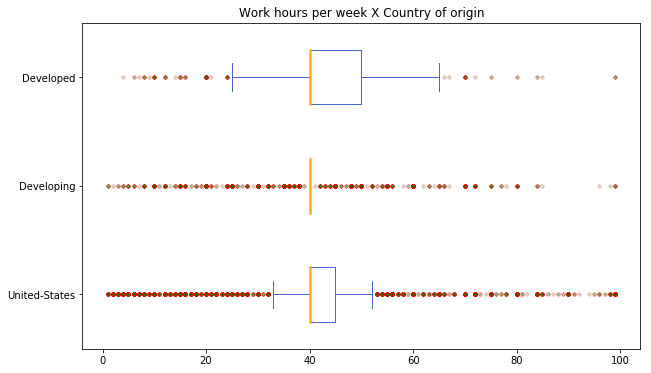

In [34]:
# Questao 1.3 - Box Plot

fig, ax = plt.subplots(figsize=(10,6))

boxPlot_hours_country = ax.boxplot([df_hrs_per_week_unitedstates.hr_per_week.values , 
           df_hrs_per_week_developing.hr_per_week.values,
           df_hrs_per_week_developed.hr_per_week.values ], 
           widths=0.5,
           sym='gD',
           labels=['United-States', 'Developing', 'Developed'],
           vert=False)

plt.setp(boxPlot_hours_country['fliers'],   markersize=3, markeredgecolor='#ff0000', alpha=0.2)
plt.setp(boxPlot_hours_country['caps'],     color='#4466CC')
plt.setp(boxPlot_hours_country['boxes'],    color='#4466CC')
plt.setp(boxPlot_hours_country['whiskers'], color='#4466CC')
plt.setp(boxPlot_hours_country['medians'], color='#ffb200', linestyle='-',linewidth=2.5 )



ax.set_title('Work hours per week X Country of origin')

pass


In [35]:
# Questao 1.4 - Metricas 

df_hours_per_week_country = df.groupby('country_type').agg( {'hr_per_week':['count','mean'] } )
df_hours_per_week_country


hr_per_week           
                    count       mean
country_type                        
Developed             617  41.820097
Developing           2774  40.021629
United-States       29170  40.447755

### Questão 1, Conclusão

**Questão**: A diferença de horas trabalhadas entre americanos e não americanos é significativa?

**Conclusão**: A diferença da média das horas trabalhadas é muito baixa, tendendo ligeiramente para cima nos estrangeiros. A variação na quantidade de horas trabalhadas dos estrangeiros é maior, mas vale ressaltar que a quantidade de dados presentes para estrangeiros também é menor.

In [36]:
# Questao 2.1 - Preparando Dados

df_sex_race_income = df.groupby(['race','sex','income']).size()
df_sex_race_income = df_sex_race_income.unstack(['income' ]).fillna(0)
df_sex_race_income


income                     <=50K\n  >50K\n
race               sex                    
Amer-Indian-Eskimo Female      107      12
                   Male        168      24
Asian-Pac-Islander Female      303      43
                   Male        460     233
Black              Female     1465      90
                   Male       1272     297
Other              Female      103       6
                   Male        143      19
White              Female     7614    1028
                   Male      13085    6089

In [37]:
# Questao 2.2 - Calculando proporcoes

def incomeProportion_A1( row ):
    return 100 * row['<=50K\n'] / ( row['<=50K\n'] + row['>50K\n'] )

def incomeProportion_A2( row ):
    return 100 * row['>50K\n'] / ( row['<=50K\n'] + row['>50K\n'] )


df_sex_race_income['<= 50k factor'] = df_sex_race_income.apply (lambda row: incomeProportion_A1 (row),axis=1)
df_sex_race_income['> 50k factor'] = df_sex_race_income.apply (lambda row: incomeProportion_A2 (row),axis=1)

df_sex_race_income = df_sex_race_income.drop(['<=50K\n', '>50K\n'], axis=1)

df_sex_race_income


income                     <= 50k factor  > 50k factor
race               sex                                
Amer-Indian-Eskimo Female      89.915966     10.084034
                   Male        87.500000     12.500000
Asian-Pac-Islander Female      87.572254     12.427746
                   Male        66.378066     33.621934
Black              Female      94.212219      5.787781
                   Male        81.070746     18.929254
Other              Female      94.495413      5.504587
                   Male        88.271605     11.728395
White              Female      88.104605     11.895395
                   Male        68.243455     31.756545

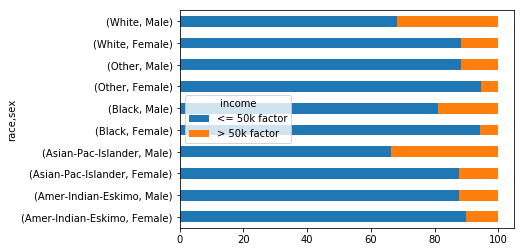

In [38]:
# Questao 2.2 - Calculando proporcoes

df_sex_race_income.plot(kind='barh', stacked=True)

### Questão 2, Conclusão

**Questão**: A proporção entre a salarios abaixo e acima de 50k entre os sexos muda quando se considera tambem a raça?

Esboço: No geral, mulheres possuem uma renda menor do que dos homens. Essa fator é agravado ainda mais por por acumulação quando consideramos o fator raciais, onde podemos observar que negros no geral ganham menos, e mulheres negras ganham menos do que mulheres brancas.